In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def protein_production (x, alpha1, alpha2, a, c, b, d): 
    """Return the cis-regulatory function i.e. the protein production rate, written as hill equations.
    
    Keyword arguments:
    x      -- input numpy array of concentration of 2 gene products X and Y.
    alpha1 -- basal production term of gene X.
    alpha2 -- basal production term of gene Y.
    a      -- auto-activation strength of gene X.
    c      -- auto-activation strength of gene Y.
    b      -- cross-inhibitory strength of gene Y on gene X.
    d      -- cross-inhibitory strength of gene X on gene Y.  """
  
    xp,yp = x[0],x[1]
    xdot = (alpha1 + (xp**4 / (a**4+xp**4 )))*(b**4/ (b**4 +yp**4))
    ydot = (alpha2 + (yp**4 / (c**4+yp**4 )))*(d**4/ (d**4 + xp**4)) 
    f = np.array([xdot, ydot])
    return f

In [54]:
def decay (x, lambda1, lambda2):
    """Return the decay rate.
    
    Keyword arguments:
    lambda1-- decay rate of protein product X.
    lambda2-- decay rate of protein product Y. """
    
    xd,yd = x[0],x[1]
    xdot = lambda1*xd
    ydot = lambda2*yd
    f = np.array([xdot, ydot])
    return f
    

In [55]:
def deterministic_term (protein_production, decay):
    """Return the deterministic/mean function of the chemical langevin equation (CLE).
    
    This is equivalent to the Reaction Rate Equation determined from the law of mass action in classic chemical kinetics""" 
  
    xp,yp,xd,yd = protein_production[0] , protein_production[1], decay[0], decay[1]
    xdot = xp-xd
    ydot = yp-yd
    f = np.array([xdot, ydot])
    return f

In [226]:
x0 = [0.1, 0.1]
alpha1 = 0.25
alpha2 = 0.25
a = 0.25
c = 0.25
b = 0.4
d = 0.4
lambda1 = 0.25
lambda2 = 0.25
dt = 0.001
omega = 10
#constant_noise = 0.10

dt = .001  # Time step.
T = 100  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
sqrtdt =  np.sqrt(dt / omega) 

## Simulating the chemical langevin equation with the Euler-Marayama method



In [231]:
x = np.zeros((2,n))
x[0][0]= 0.1
x[1][0] = 0.1

for i in range(n - 1):
    pp = protein_production([x[0][i], x[1][i]],alpha1,alpha2,a,c,b,d)
    de = decay([x[0][i], x[1][i]],lambda1,lambda2)
    detT = deterministic_term(pp,de)
    stochastic_term = np.array([np.sqrt(pp[0] + de[0]), np.sqrt(pp[1] + de[1])])
    print(de)
    x[0][i + 1] = x[0][i] + dt * detT[0] + stochastic_term[0] * sqrtdt * np.random.randn()
    x[1][i + 1] = x[1][i] + dt * detT[1] + stochastic_term[1] * sqrtdt * np.random.randn()

[0.025 0.025]
[0.02526    0.02497519]
[0.02475129 0.02468327]
[0.0262603  0.02504897]
[0.02624008 0.02484635]
[0.02418333 0.02687462]
[0.02466378 0.02449125]
[0.02659231 0.02422984]
[0.02590114 0.02288659]
[0.02585316 0.02412707]
[0.02619129 0.026004  ]
[0.02556285 0.02741032]
[0.0258442  0.02634462]
[0.02360618 0.02412733]
[0.02288423 0.02203371]
[0.02288612 0.02433372]
[0.02097068 0.02183905]
[0.02170717 0.02243904]
[0.02333852 0.02250459]
[0.02248651 0.02131331]
[0.02259663 0.0212158 ]
[0.02264486 0.02027987]
[0.02233174 0.0206293 ]
[0.02400162 0.02083025]
[0.02364611 0.02427903]
[0.02442522 0.02240167]
[0.02415064 0.02306575]
[0.02178124 0.02214502]
[0.02475134 0.02252142]
[0.0243337 0.0218964]
[0.02195357 0.02170166]
[0.02374724 0.02315768]
[0.02283986 0.02298686]
[0.0240335  0.02206786]
[0.02451355 0.02107082]
[0.023335   0.02152328]
[0.02454386 0.02059126]
[0.02528181 0.02048662]
[0.02763306 0.01998496]
[0.02818406 0.01930896]
[0.02756801 0.01979005]
[0.0288121  0.02319473]
[0.0

<ipython-input-231-9c9ab8c1e185>:9: RuntimeWarning: invalid value encountered in sqrt
  stochastic_term = np.array([np.sqrt(pp[0] + de[0]), np.sqrt(pp[1] + de[1])])



[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]

In [232]:
###Interpolating values
k = 10
x_interpolate = np.interp(np.arange(n * k), np.arange(n) * k, x[0]) 
#1) All x_vals to do interpolation on #2) Actual x_val values that u feed into function x 
#3) The function f(x)

y_interpolate = np.interp(np.arange(n * k), np.arange(n) * k, x[1])

Text(0.5, 1.0, 'Phase portrait of X and Y with simulated trajectory')

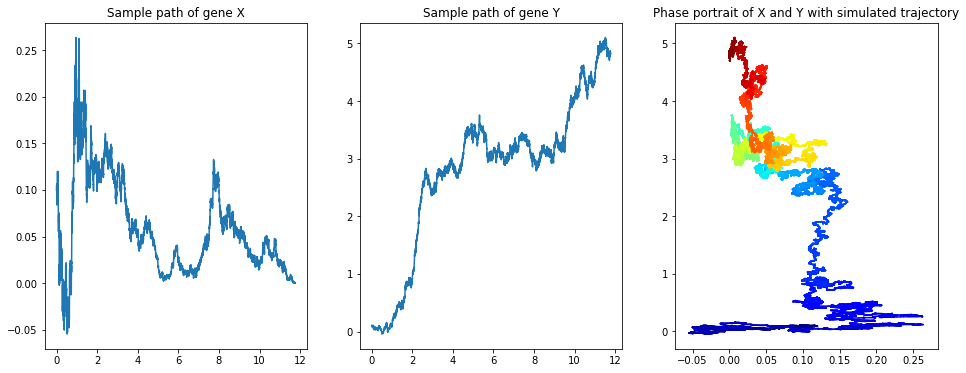

In [233]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))
ax0, ax1, ax2 = axes.flatten()

ax0.plot(t,x[0])
ax0.set_title("Sample path of gene X")
ax1.plot(t,x[1])
ax1.set_title("Sample path of gene Y")
ax2.scatter(x_interpolate, y_interpolate, c = range(n * k), cmap=plt.cm.jet, linewidths=0, marker='o', s=3)
ax2.set_title("Phase portrait of X and Y with simulated trajectory")


In [56]:
def multiplicative_noise (protein_production, decay, dt, omega):
    """Return the multiplicative noise term of the chemical langevin equation (CLE).
    
    Keyword arguments:
    omega -- Volume parameter relates concentrations to the number of molecules as such:
    (number of molecules = omega * concentration)
    
    Derive the stochastic_term variable by examining the variance of the diffusion approximation of the
    immigration-death process, which is simply the expectation of X^2. """
    
    white_noise = np.random.randn(2)
    #white_noise = [u,v for u,v in zip(white_noise_X, white_noise_Y)]
    sqrtdt =  np.sqrt(dt / omega) 
    stochastic_term = np.array([np.sqrt(protein_production[0] + decay[0]), np.sqrt(protein_production[1] + decay[1])])
    f = stochastic_term * sqrtdt * white_noise
    
    return f

In [57]:
def additive_noise (constant_noise, dt, omega):
    """Return the additive noise term of the langevin equation.
    
    Keyword arguments:
    constant_noise -- State-independent, constant noise term. """
    
    white_noise = np.random.randn(2)
    sqrtdt =  np.sqrt(dt / omega) 
    f = constant_noise * sqrtdt * white_noise
    
    return f



In [8]:
def chemical_langevin_equation(deterministic_term, multiplicative_noise):
    """Return the chemical langevin equation (CLE).
    
    Write as sum of the deterministic term and the multiplicative noise term"""
    
    xdet,ydet, xmnoise, ymnoise = deterministic_term[0], deterministic_term[1], multiplicative_noise[0], multiplicative_noise[1]
    xdot = xdet + xmnoise
    ydot = ydet + ymnoise
    f = np.array([xdot, ydot])
    
    return f


In [9]:
def langevin_equation(deterministic_term, additive_noise):
    """Return the langevin equation.
    
    Write as sum of the deterministic term and the additive noise term"""
    
    xdet,ydet, xanoise, yanoise = deterministic_term[0], deterministic_term[1], additive_noise[0], additive_noise[1]
    xdot = xdet + xanoise
    ydot = ydet + yanoise
    f = np.array([xdot, ydot])
    
    return f

## Testing functions

In [48]:
x0 = [0.1, 0.1]
alpha1 = 0.25
alpha2 = 0.25
a = 0.25
c = 0.25
b = 0.4
d = 0.4
lambda1 = 0.25
lambda2 = 0.25
dt = 0.001
omega = 10
constant_noise = 0.10

In [49]:
pp = protein_production(x0,alpha1,alpha2,a,c,b,d)
de = decay(x0,lambda1,lambda2)
detT = deterministic_term(pp,de)
mn = multiplicative_noise(pp,de,dt,omega)
an = additive_noise(constant_noise,dt,omega)
cle = chemical_langevin_equation(detT, mn)
le = langevin_equation(detT, an)

print(pp, de, detT, mn, an, cle, le, sep="\n")

[0.27389111 0.27389111]
[0.025 0.025]
[0.24889111 0.24889111]
[-0.00152421  0.0074627 ]
[ 0.00024943 -0.00100283]
[0.2473669  0.25635382]
[0.24914054 0.24788828]


In [109]:
dt = 0.00001
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

x = np.zeros((2,n))

for i in range(n-1):
    for j in range(2):
        x[j][i+1] = x[j][i] + chemical_langevin_equation(detT, multiplicative_noise(pp,de,dt,omega))[j]

In [63]:
print(mn)

[-0.00152421  0.0074627 ]


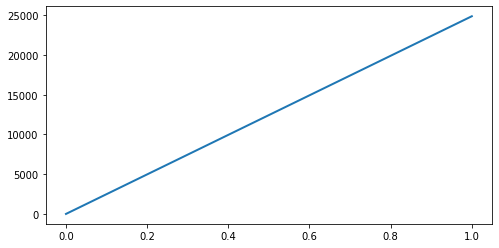

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x[1], lw=2)

In [18]:
x = np.zeros((2,n))
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])